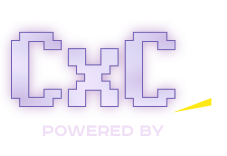
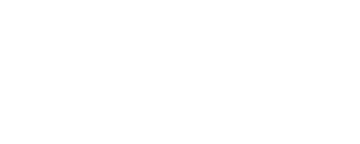

# Infinite Investment Systems Challenge

### The Challenge

The challenge involves analyzing a comprehensive dataset on customer behavior within the wealth management services domain. The dataset, consisting of many columns, aggregates information from various tables, offering insights into customer interactions, financial transactions, trading activities, and overall financial behaviors.

The primary focus is on predicting customer churn and estimating lifetime value.


### What is this notebook for?
This notebook will provide an introductory example to working with the data provided for the Infinite Investment Systems Challenge.

Note that the work done in this notebook is very introductory and leaves a lot of room for improvement when it comes to model selection and data preprocessing!

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Copy Dataset into your Google Drive
1. Right Click `history.csv` and select "Make a Copy". This will create a copy of the dataset into your drive
2. **Make sure to rename the copy from "Copy of history.csv" to "history.csv"**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/history.csv")

In [ ]:
df.head(3)

,id,type_code,is_registered,country_code,currency_code,is_active,class_id,debit_code,last_trade_date,contract_type,...,is_hrdc_resp,is_plan_grandfathered,resp_specimen_plan,inserted_at,updated_at,is_olob,retail_last_maintenance_time,retail_last_maintenance_user,visible_in_reports,label
0,893724,CASH SWEEP,f,NaN,CAD,t,3.0,0,NaN,NaN,...,NaN,NaN,NaN,2023-05-30 14:20:18.531115+00,2023-08-08 18:53:01.439561+00,f,NaN,NaN,f,0
1,1268094,RRIF,t,NaN,CAD,t,5.0,C,2022-07-04,18.0,...,f,f,NaN,2023-05-30 14:20:18.531115+00,2023-08-10 21:47:25.370403+00,f,2023-01-03 00:00:00,BATCH,t,0
2,606613,SPOUSAL RRSP,t,NaN,CAD,t,5.0,A,2018-07-05,16.0,...,f,f,NaN,2023-05-30 14:20:18.531115+00,2023-08-10 21:47:25.370403+00,f,2018-07-17 00:00:00,GUERINO,f,0


# Let's try fitting a model to predict customers who will churn

We'll use **Decision Trees** as an example, but feel free to explore other models (Random Forest, XGBoost, etc.) and neural network-based approaches.

The labels for the dataset is either "Churn" or "No Churn" which are strings. A Machine Learning model can't directly support non-numerical data, so we use a `LabelEncoder` to convert "Churn" to `0` and "No Churn" to `1`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' contains your target variable with string labels
label_encoder = LabelEncoder()

# Fit and transform the 'size_class' column
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop(["label"], axis=1)
y = df["label"]

### Excluding Non-Numerical Data
For simplicity, we have excluded all categorical and datetime columns (those with string values, datetime, etc.) in this guide.

However, **strongly consider** including them in your training process, as they can offer valuable information. [This Guide](https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html) helps explain how you can use categorical data in your training.

In [ ]:
# Identify numeric columns
numeric_columns = [
    col for col in X.columns
    if X[col].dtype in ["float64", "int64"]
]

# Specify the features without categorical columns
X = X[numeric_columns]

### Filling Missing Value
For simplicity, we will fill all missing values with 0.

This isn't necessarily the optimal thing to do, and we strongly consider using alternative methods. [This Guide](https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values) intuitively explains how to deal with missing values.

In [ ]:
X = X.fillna(0)

#### Train-Test Split
The training set is split into subsets for training and testing, commonly referred to as the validation set. This enables us to evaluate the model's performance before applying it to the actual test set.

[This guide](https://blog.roboflow.com/train-test-split/) crucially explains why we do this.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

### Training the model
As mentioned previously, we'll be using a Decision Tree Classifier for this guide. You can read more about decision trees in [this guide](https://www.datacamp.com/tutorial/decision-tree-classification-python).

Note that we don't perform any **hyperparameter tuning** in this guide, but we strongly recommend that you do to maximize your models performance!

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create your decision tree classifier
classifier = DecisionTreeClassifier()

#### Evaluating our model
We'll be using two methods to evaluate our model:
1. Cross Validation Accuracy score - Find more details [here](https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right)
2. F1 Score. **This will be the metric that we'll use to evaluate your submissions**. You can read more about it [here](https://www.v7labs.com/blog/f1-score-guide).

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
print(f"Average CV Score: {sum(cv_scores)/len(cv_scores)}")

Average CV Score: 0.8338057876836512


In [ ]:
from sklearn.metrics import f1_score

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_val)
f1 = f1_score(y_val, y_pred)

print(f"F1 Score: {f1}")

F1 Score: 0.5987404408457041


Hmmmm, thats weird.... Accuracy in Cross Validation is high, but F1 Score is low. Hint: This is caused by an imbalance in the number of churn and number of no churn clients. Read [this guide](https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html) on how to deal with imbalanced datasets.

Try and aim for a model with >70% F1 Score and >75% CV score on your validation set.

# Conclusion
This marks the end of this guide. For this challenge you'll need to use your trained model to make predictions on which of the current selection of clients is likely or not to churn. The list of those clients can be found in the `test.csv` dataset.

Run inference on this list and save the inference results as a CSV file. The file should adhere to the following format:

```csv
id, predicted
1155742, No Churn
1269359, Churn
595581, Churn
3866311, No Churn
....
```

Good luck with your submissions!